In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,roc_auc_score,roc_curve,classification_report




In [2]:
bank1 = pd.read_csv('C:/Users/Anup0/OneDrive/Desktop/ExcelR/Assignment/Assignment6/bank-full.csv',sep=';')
bank1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank1.shape

(45211, 17)

In [4]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
bank1.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [7]:
bank1.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [8]:
bank1.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [9]:
bank1.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [10]:
bank1.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [11]:
bank1.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [12]:
bank1.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [13]:
bank1.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [14]:
bank1.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [15]:
bank1.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [16]:
bank1['Target'] = np.where(bank1['y']=='yes',1,0)
bank1.drop(['y'],axis = 1,inplace = True)

In [17]:
bank1.Target.value_counts()

0    39922
1     5289
Name: Target, dtype: int64

In [18]:
correlation = bank1.corr()
correlation

C:\Users\Anup0\AppData\Local\Temp\ipykernel_6340\2920827490.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = bank1.corr()


,age,balance,day,duration,campaign,pdays,previous,Target
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
Target,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


<Axes: >

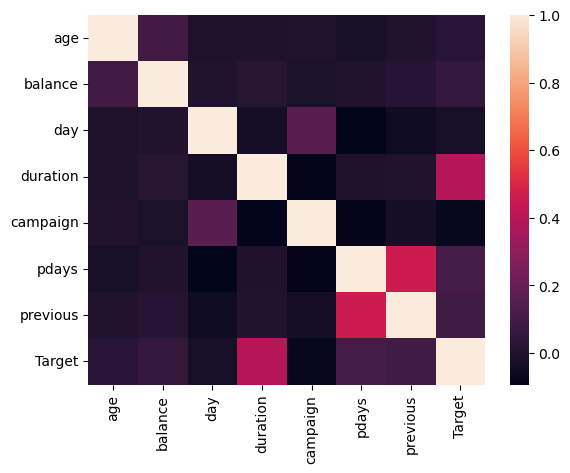

In [19]:
sns.heatmap(correlation)

## Using Crosstab to find impact of each variable on Target:

In [20]:
ct_marital = pd.crosstab(index = bank1['marital'],
           columns = bank1['Target'],
           values = bank1['Target'],
           aggfunc = 'count',
           normalize='index')
ct_marital

Target,0,1
marital,,
divorced,0.880545,0.119455
married,0.898765,0.101235
single,0.850508,0.149492


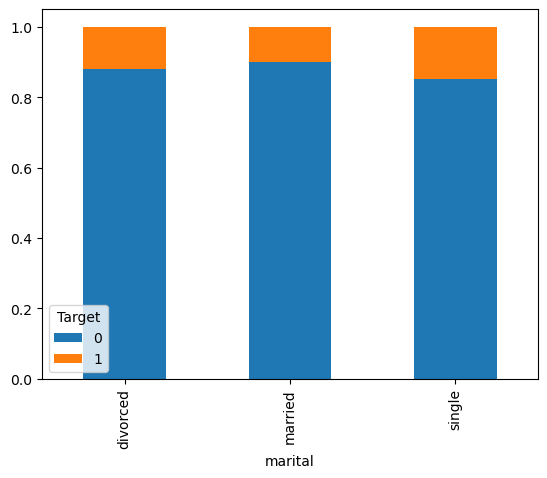

In [21]:
ct_marital.plot(kind = 'bar',stacked = True)
plt.show()

In [22]:
ct_loan = pd.crosstab(index = bank1['loan'],
           columns = bank1['Target'],
           values = bank1['Target'],
           aggfunc = 'count')
ct_loan

Target,0,1
loan,,
no,33162,4805
yes,6760,484


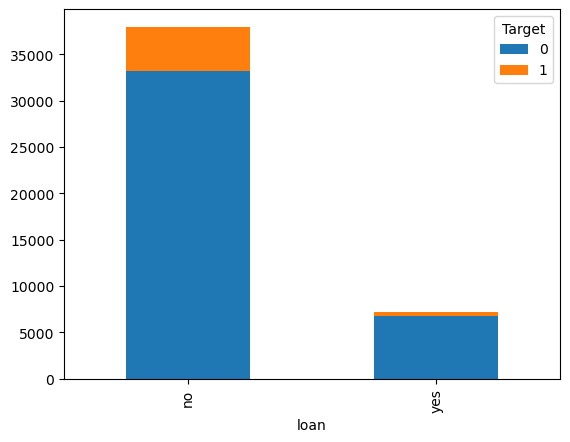

In [23]:
ct_loan.plot(kind = 'bar',stacked = True)
plt.show()

In [24]:
ct_housing = pd.crosstab(index = bank1['housing'],
           columns = bank1['Target'],
           values = bank1['Target'],
           aggfunc = 'count')
ct_housing

Target,0,1
housing,,
no,16727,3354
yes,23195,1935


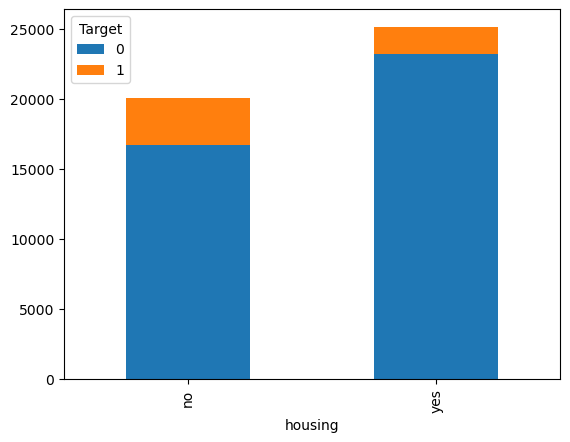

In [25]:
ct_housing.plot(kind = 'bar',stacked = True)
plt.show()

In [26]:
ct_default =pd.crosstab(index = bank1['default'],
           columns = bank1['Target'],
           values = bank1['Target'],
           aggfunc = 'count',
            normalize='index')
ct_default

Target,0,1
default,,
no,0.882039,0.117961
yes,0.936196,0.063804


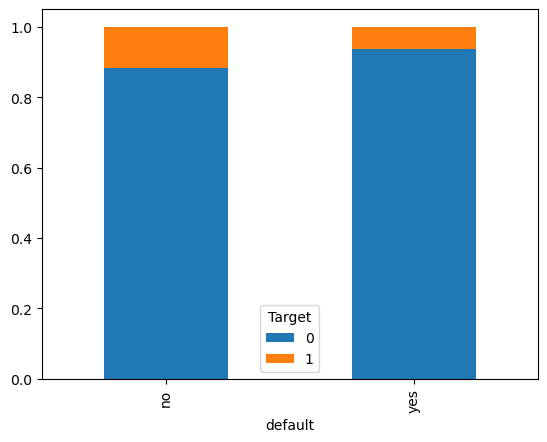

In [27]:
ct_default.plot(kind = 'bar',stacked = True)
plt.show()

In [28]:
ct_education = pd.crosstab(index = bank1['education'],
           columns = bank1['Target'],
           values = bank1['Target'],
           aggfunc = 'count',
           normalize = 'index')
ct_education

Target,0,1
education,,
primary,0.913735,0.086265
secondary,0.894406,0.105594
tertiary,0.849936,0.150064
unknown,0.864297,0.135703


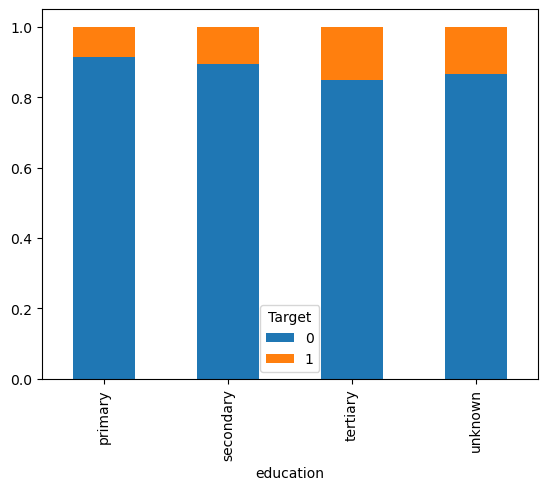

In [29]:
ct_education.plot(kind = 'bar',stacked = True)
plt.show()

In [30]:
ct_contact = pd.crosstab(index = bank1['contact'],
           columns = bank1['Target'],
           values = bank1['Target'],
           aggfunc = 'count')
ct_contact

Target,0,1
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


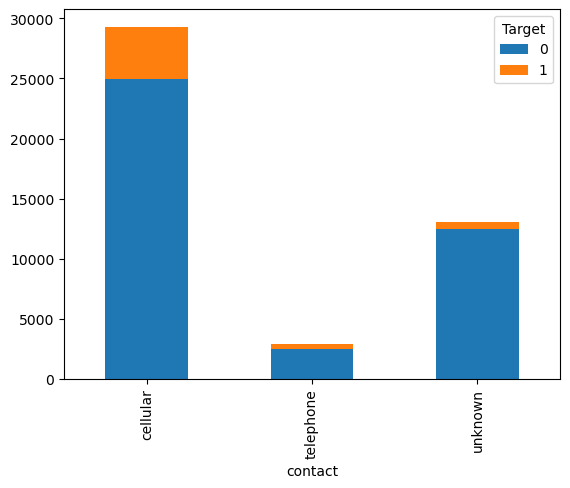

In [31]:
ct_contact.plot(kind = 'bar',stacked = True)
plt.show()

In [32]:
ct_month = pd.crosstab(index = bank1['month'],
           columns = bank1['Target'],
           values = bank1['Target'],
           aggfunc = 'count',
           normalize='index')
ct_month

Target,0,1
month,,
apr,0.803206,0.196794
aug,0.889867,0.110133
dec,0.532710,0.467290
feb,0.833522,0.166478
jan,0.898788,0.101212
jul,0.909065,0.090935
jun,0.897772,0.102228
mar,0.480084,0.519916
may,0.932805,0.067195


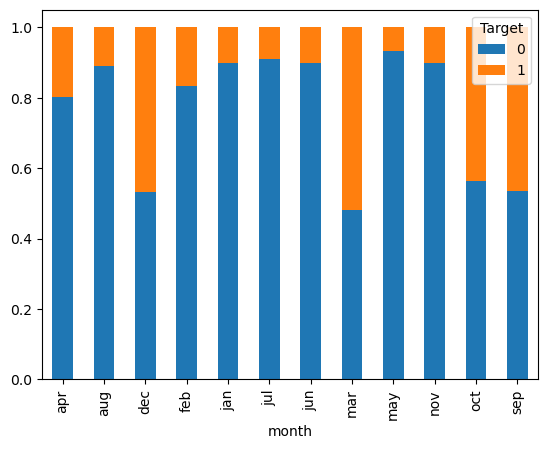

In [33]:
ct_month.plot(kind = 'bar',stacked = True)
plt.show()

In [34]:
ct_poutcome = pd.crosstab(index = bank1['poutcome'],
           columns = bank1['Target'],
           values = bank1['Target'],
           aggfunc = 'count')
ct_poutcome

Target,0,1
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


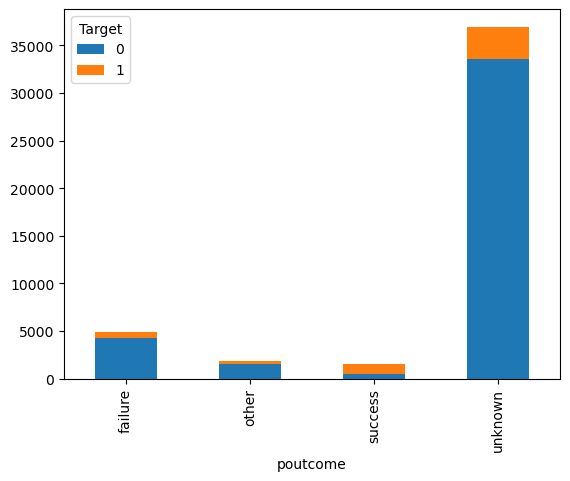

In [35]:
ct_poutcome.plot(kind = 'bar',stacked = True)
plt.show()

<Axes: xlabel='Target', ylabel='age'>

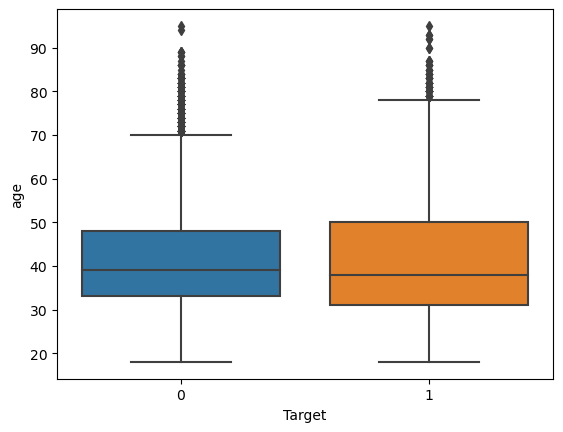

In [36]:
#Let's plot a boxplot with Target and Age:
sns.boxplot(x = bank1['Target'] , y = bank1['age'])

## Model Building

In [37]:
X = bank1.drop(['Target'],axis = 1)

Y = bank1['Target']

In [38]:
X = pd.get_dummies(X,drop_first = True)

In [39]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [40]:
#Checking for Multi-coliniarity:
def vif_cal(input_data):
    x_var = input_data
    x_cols = input_data.columns
    for i in range(0,x_cols.shape[0]):
        y = x_var[x_cols[i]]
        x = x_var[x_cols.drop(x_cols[i])]
        rsq = smf.ols(formula = 'y~x',data = x_var).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(x_cols[i], 'VIF = ', vif)

In [41]:
vif_cal(X)

age VIF =  1.72
balance VIF =  1.05
day VIF =  1.35
duration VIF =  1.02
campaign VIF =  1.12
pdays VIF =  4.68
previous VIF =  1.41
job_blue-collar VIF =  2.51
job_entrepreneur VIF =  1.31
job_housemaid VIF =  1.29
job_management VIF =  3.03
job_retired VIF =  1.71
job_self-employed VIF =  1.32
job_services VIF =  1.65
job_student VIF =  1.26
job_technician VIF =  2.12
job_unemployed VIF =  1.25
job_unknown VIF =  1.09
marital_married VIF =  2.54
marital_single VIF =  2.88
education_secondary VIF =  2.61
education_tertiary VIF =  3.39
education_unknown VIF =  1.3
default_yes VIF =  1.02
housing_yes VIF =  1.46
loan_yes VIF =  1.06
contact_telephone VIF =  1.1
contact_unknown VIF =  2.43
month_aug VIF =  3.11
month_dec VIF =  1.08
month_feb VIF =  1.98
month_jan VIF =  1.52
month_jul VIF =  3.09
month_jun VIF =  3.51
month_mar VIF =  1.17
month_may VIF =  4.78
month_nov VIF =  2.23
month_oct VIF =  1.27
month_sep VIF =  1.23
poutcome_other VIF =  1.34
poutcome_success VIF =  1.4
poutco

In [42]:
#Z-score normlization:
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
X = pd.DataFrame(X_trans, columns=X.columns)
X.head()


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,-0.523740,5.422561,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,1.909346,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519


In [43]:
#Logistic Regression using stats model:
logreg = sm.Logit(Y,sm.add_constant(X))
model1 = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.238463
         Iterations 8


In [44]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45168
Method:                           MLE   Df Model:                           42
Date:                Sat, 26 Aug 2023   Pseudo R-squ.:                  0.3392
Time:                        01:55:55   Log-Likelihood:                -10781.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.8437      0.025   -111.665      0.000      -2.894      -2.794
age                     0.0012      0.023      0.051      0.959      -0.045       0.047
balance         

In [45]:
#Lets remove columns with VIF > 5 and try again:
X.drop(['pdays','poutcome_unknown'],axis = 1,inplace=True)
vif_cal(X)

age VIF =  1.72
balance VIF =  1.05
day VIF =  1.34
duration VIF =  1.02
campaign VIF =  1.12
previous VIF =  1.2
job_blue-collar VIF =  2.51
job_entrepreneur VIF =  1.3
job_housemaid VIF =  1.29
job_management VIF =  3.03
job_retired VIF =  1.7
job_self-employed VIF =  1.32
job_services VIF =  1.65
job_student VIF =  1.26
job_technician VIF =  2.12
job_unemployed VIF =  1.24
job_unknown VIF =  1.09
marital_married VIF =  2.54
marital_single VIF =  2.88
education_secondary VIF =  2.6
education_tertiary VIF =  3.39
education_unknown VIF =  1.3
default_yes VIF =  1.01
housing_yes VIF =  1.44
loan_yes VIF =  1.06
contact_telephone VIF =  1.09
contact_unknown VIF =  2.24
month_aug VIF =  3.05
month_dec VIF =  1.08
month_feb VIF =  1.97
month_jan VIF =  1.52
month_jul VIF =  3.01
month_jun VIF =  3.51
month_mar VIF =  1.17
month_may VIF =  4.77
month_nov VIF =  2.19
month_oct VIF =  1.27
month_sep VIF =  1.23
poutcome_other VIF =  1.15
poutcome_success VIF =  1.11


In [46]:
logreg = sm.Logit(Y,sm.add_constant(X))
model2 = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.238478
         Iterations 8


In [47]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45170
Method:                           MLE   Df Model:                           40
Date:                Sat, 26 Aug 2023   Pseudo R-squ.:                  0.3392
Time:                        01:55:59   Log-Likelihood:                -10782.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.8433      0.025   -111.709      0.000      -2.893      -2.793
age                     0.0018      0.023      0.078      0.938      -0.044       0.048
balance                 0.0391      0.016      2.495      0.013       0.008       0.070
day                     0.0825      0.021      3.969      0.000       0.042       0.123
duration                1.0792      0.017     65.017      0.000       1.047       1.112
campaign               -0.2828      0.031     -9.007      0.000      -0.344      -0.221
previous                0.0293      0.016      1.864      0.062      -0.002       0.060
job_blue-collar        -0.1276      0.030     -4.274      0.000      -0.186      -0.069
job_entrepreneur       -0.0638      0.022     -2.847      0.004      -0.108      -0.020
job_housemaid          -0.0821      0.022     -3.686      0.000      -0.126      -0.038
job_management         -0.0674      0.030     -2.261      0.024      -0.126      -0.009
job_retired             0.0549      0.021      2.591      0.010       0.013       0.096
job_self-employed      -0.0548      0.021     -2.666      0.008      -0.095      -0.015
job_services           -0.0650      0.024     -2.675      0.007      -0.113      -0.017
job_student             0.0546      0.016      3.515      0.000       0.024       0.085
job_technician         -0.0659      0.026     -2.558      0.011      -0.116      -0.015
job_unemployed         -0.0299      0.019     -1.603      0.109      -0.067       0.007
job_unknown            -0.0249      0.019     -1.343      0.179      -0.061       0.011
marital_married        -0.0874      0.029     -3.033      0.002      -0.144      -0.031
marital_single          0.0416      0.030      1.374      0.170      -0.018       0.101
education_secondary     0.0922      0.032      2.848      0.004       0.029       0.156
education_tertiary      0.1732      0.034      5.048      0.000       0.106       0.240
education_unknown       0.0500      0.021      2.423      0.015       0.010       0.090
default_yes            -0.0026      0.022     -0.120      0.905      -0.045       0.040
housing_yes            -0.3341      0.022    -15.428      0.000      -0.377      -0.292
loan_yes               -0.1558      0.022     -7.080      0.000      -0.199      -0.113
contact_telephone      -0.0406      0.018     -2.203      0.028      -0.077      -0.004
contact_unknown        -0.7414      0.033    -22.781      0.000      -0.805      -0.678
month_aug              -0.2425      0.027     -9.017      0.000      -0.295      -0.190
month_dec               0.0476      0.012      3.925      0.000       0.024       0.071
month_feb              -0.0349      0.021     -1.666      0.096      -0.076       0.006
month_jan              -0.2190      0.021    -10.384      0.000      -0.260      -0.178
month_jul              -0.3028      0.028    -10.997      0.000      -0.357      -0.249
month_jun               0.1463      0.030      4.840      0.000       0.0

In [48]:
model2.params

const                 -2.843327
age                    0.001814
balance                0.039082
day                    0.082453
duration               1.079190
campaign              -0.282777
previous               0.029305
job_blue-collar       -0.127643
job_entrepreneur      -0.063751
job_housemaid         -0.082138
job_management        -0.067402
job_retired            0.054918
job_self-employed     -0.054788
job_services          -0.064957
job_student            0.054601
job_technician        -0.065921
job_unemployed        -0.029939
job_unknown           -0.024936
marital_married       -0.087449
marital_single         0.041610
education_secondary    0.092212
education_tertiary     0.173222
education_unknown      0.049964
default_yes           -0.002597
housing_yes           -0.334069
loan_yes              -0.155798
contact_telephone     -0.040607
contact_unknown       -0.741390
month_aug             -0.242522
month_dec              0.047628
month_feb             -0.034935
month_ja

In [49]:
#Creating model using Logistic Regression from sklearn:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=3)

In [50]:
model3 = LogisticRegression()

In [51]:
model3.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_train_predict = model3.predict(X_train)

In [53]:
accuracy_score(y_train,y_train_predict)

0.9012939615129396

In [54]:
y_test_pred = model3.predict(X_test)

In [55]:
accuracy_score(y_test,y_test_pred)

0.9033506579674887

In [56]:
confusion_matrix(y_test,y_test_pred)

array([[7767,  179],
       [ 695,  402]], dtype=int64)

In [57]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7946
           1       0.69      0.37      0.48      1097

    accuracy                           0.90      9043
   macro avg       0.80      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



In [58]:
y_pred_prob = model3.predict_proba(X_test)
print(y_pred_prob)

[[0.98267256 0.01732744]
 [0.97032035 0.02967965]
 [0.97517858 0.02482142]
 ...
 [0.89328065 0.10671935]
 [0.99420603 0.00579397]
 [0.93376795 0.06623205]]


In [59]:
logit_roc_curve = roc_auc_score(y_test,y_test_pred)
logit_roc_curve

0.6719634538605046

[0.         0.02252706 1.        ] [0.         0.36645397 1.        ] [2 1 0]


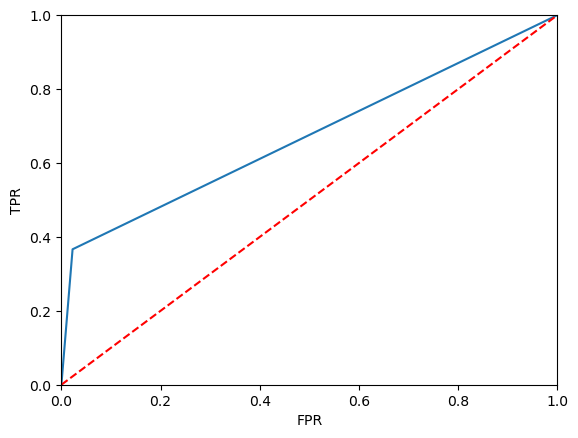

In [60]:
#Plotting the ROC curve:
fpr,tpr,threshold = roc_curve(y_test,y_test_pred)
print(fpr,tpr,threshold)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [61]:
#By increasing my FPR by 3% , I'm able to achive almost 35 % True Positive

In [62]:
#Predict the probability value for X
pred_proba_df = pd.DataFrame(y_pred_prob)
pred_proba_df

,0,1
0,0.982673,0.017327
1,0.970320,0.029680
2,0.975179,0.024821
3,0.939570,0.060430
4,0.955839,0.044161
...,...,...
9038,0.964056,0.035944
9039,0.981909,0.018091
9040,0.893281,0.106719
9041,0.994206,0.005794



*************  For i = 0.2 *************
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7946
           1       0.52      0.69      0.59      1097

    accuracy                           0.89      9043
   macro avg       0.74      0.80      0.76      9043
weighted avg       0.90      0.89      0.89      9043



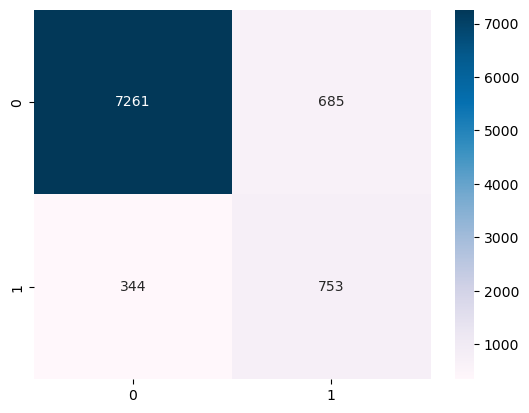

               

*************  For i = 0.3 *************
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7946
           1       0.60      0.56      0.58      1097

    accuracy                           0.90      9043
   macro avg       0.77      0.75      0.76      9043
weighted avg       0.90      0.90      0.90      9043



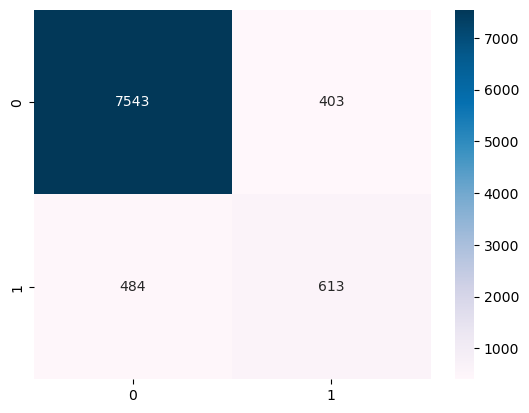

               

*************  For i = 0.4 *************
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7946
           1       0.67      0.46      0.55      1097

    accuracy                           0.91      9043
   macro avg       0.80      0.71      0.75      9043
weighted avg       0.90      0.91      0.90      9043



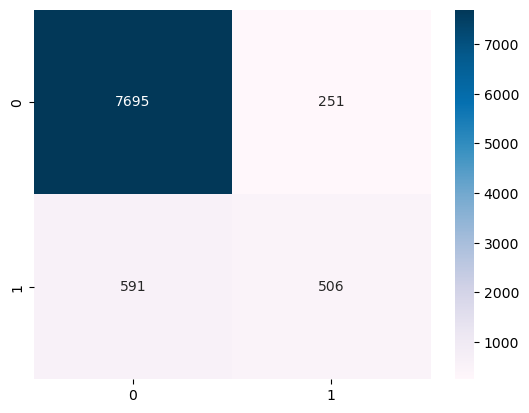

               

*************  For i = 0.5 *************
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7946
           1       0.69      0.37      0.48      1097

    accuracy                           0.90      9043
   macro avg       0.80      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043



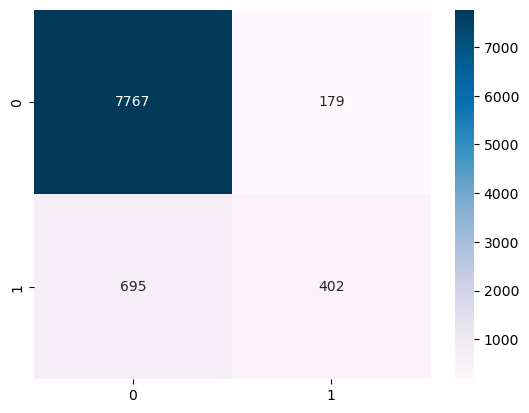

               

*************  For i = 0.6 *************
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7946
           1       0.71      0.28      0.40      1097

    accuracy                           0.90      9043
   macro avg       0.81      0.63      0.67      9043
weighted avg       0.88      0.90      0.88      9043



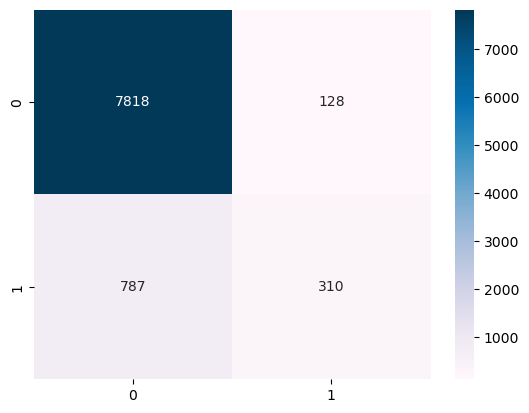

               

*************  For i = 0.7 *************
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7946
           1       0.72      0.21      0.33      1097

    accuracy                           0.89      9043
   macro avg       0.81      0.60      0.64      9043
weighted avg       0.88      0.89      0.87      9043



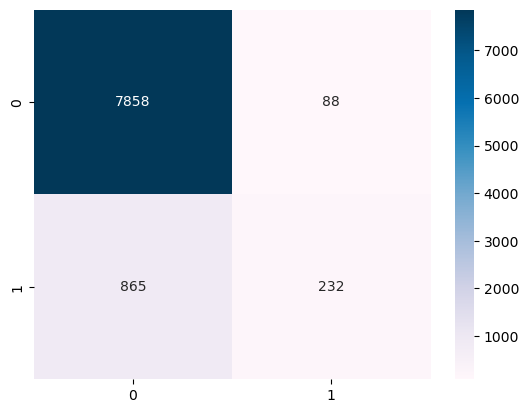

               

*************  For i = 0.8 *************
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7946
           1       0.75      0.14      0.23      1097

    accuracy                           0.89      9043
   macro avg       0.82      0.57      0.59      9043
weighted avg       0.88      0.89      0.85      9043



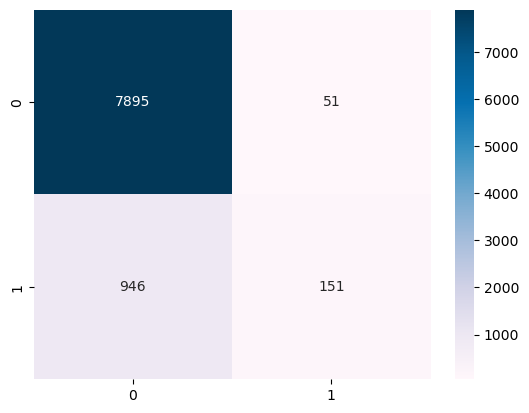

               

*************  For i = 0.9 *************
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7946
           1       0.76      0.07      0.12      1097

    accuracy                           0.88      9043
   macro avg       0.82      0.53      0.53      9043
weighted avg       0.87      0.88      0.84      9043



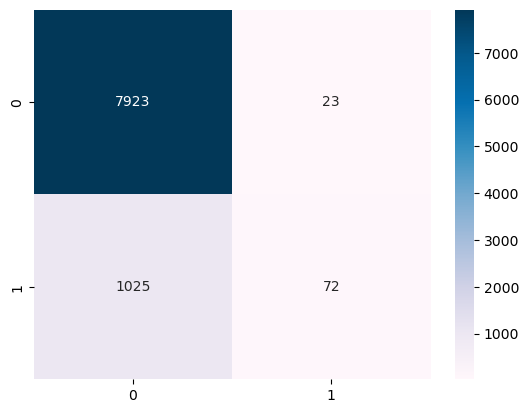

In [63]:
# Use Cut-off value to predict the recall_score and accuracy score
cutoff_list = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in cutoff_list:
    print('\n*************  For i = {} *************'.format(i))
    y_pred = pd.DataFrame(np.where(pred_proba_df.iloc[:,1:2] > i ,1,0))
    test_recall_score = recall_score(y_test,y_pred)
    test_auc_score = roc_auc_score(y_test,y_pred)
    test_precision_score = precision_score(y_test,y_pred)
    print(classification_report(y_test,y_pred))
    sns.heatmap((confusion_matrix(y_test,y_pred)),fmt='.5g',annot=True,cmap='PuBu')
    plt.show()
    print("               ")